In [49]:
import math
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#### chances of sensing a wall or door 
# robot_map=["wall","door","wall","door"]
door_sense={"wall_p0":0.4,"door_p1":0.85,"wall_p2":0.4,"door_p3":0.85}
wall_sense={"wall_p0":0.6,"door_p1":0.15,"wall_p2":0.6,"door_p3":0.15}
grid_prob={"first_grid":0.6,"same_grid":0.2,"second_grid":0.2,"yellow_grid":0.0}
init_bel_x={"p0":0.25,"p1":0.25,"p2":0.25,"p3":0.25}
steps=3

In [63]:
class RobotBase:
    
    def __init__(self,door_sense,wall_sense,grid_prob,init_bel_x,steps):
        self.door_sense=np.matrix([door_sense[x] for x in door_sense])
        self.wall_sense=np.matrix([wall_sense[x] for x in wall_sense])
        self.labels=["p0","p1","p2","p3"]
        self.eta=[]
        self.bel_x=[np.matrix([init_bel_x[x] for x in init_bel_x]).reshape(len(init_bel_x),1)]
        self.state_trans_prob=np.matrix([[grid_prob["same_grid"],0,0,0],
                                        [grid_prob["first_grid"],grid_prob["same_grid"],0,0],
                                        [grid_prob["second_grid"],grid_prob["first_grid"],grid_prob["same_grid"],0],
                                        [0,grid_prob["second_grid"],grid_prob["first_grid"],grid_prob["same_grid"]]])
        self.bel_bar_x=self.bel_bar_calc(steps)
        
#         self.bel_bar_x=bel_bar_calc()
        #initializes robotBase attribute state_trans_prob
        #state transition probability matrix
    
    def bel_bar_calc(self,steps):
        '''
        bel_bar is calculated by multiplying a state tranisition matrix with the belief matrix
        '''   
        belBar=[]
        print("Initial Position Probability: ")
        print(f"bel_x{0} = ",self.s_print(self.bel_x[0]))
        plt.figure(figsize=(10,4)) 
        plt.subplot(1,1,1)
        plt.title(f"bel(x{0})")
        plt.bar(self.labels,[nB[0] for nB in self.bel_x[0].tolist()],color=self.plot_color(self.bel_x[0]))
        plt.tight_layout()
        plt.show()
        for step in range(steps):
            print(f"\n\nState Transition Probability Matrix @ x{step+1}: ")
            print(self.state_trans_prob)
            bBar=self.state_trans_prob * self.bel_x[step]
            print("\nCalculations of bel_bar for all potential locations (p0~p3):")
            print(f"bel_bar(x{step+1}) => ",self.s_print(bBar))
            belBar.append(bBar)
            new_bel=self.eta_calc(bBar,step)
            print(f"\nNew updated belief of the robot's localization probability after step {step+1}:")
            print(f"bel(x{step+1}) => ",self.s_print(new_bel))
            self.bel_x.append(new_bel)
            self.plot_bar(step=step,bBar=bBar,nbel=new_bel)
        return belBar
            
    def eta_calc(self, bel_Bar,step):
        '''
        calculating eta based on wall or door sense
        
        '''
        new_eta=0
        odd=(step+1)%2
        door=self.door_sense
        wall=self.wall_sense
        
        if odd:
            print(f"\nProbability of the robot sensing the DOOR at step = {step+1}")
            print("Door Detected:", door)
           
            new_eta=(1/door*bel_Bar).tolist()[0][0]
        else:
            print(f"\nProbability of the robot sensing the WALL at step = {step+1}")
            print("Wall Detected:", wall)
            
            new_eta=(1/wall*bel_Bar).tolist()[0][0]
        print("\nNormalization and η calculation:")
        print(f"eta{step+1} = ",new_eta)
        self.eta.append(new_eta)
        return bel_Bar*new_eta
    
    def s_print(self,data):
        special_string=""
        for i in range (len(data)):
            special_string+=f"p{i} = {data[i].tolist()[0][0]}, "
        return special_string
    
    def plot_bar(self,step,bBar,nbel):
        j=2
        plt.figure(figsize=(10,8))  
        plt.subplot(j,1,1)
        plt.title(f"bel_bar(x{step+1})")
        plt.bar(self.labels,[bB[0] for bB in bBar.tolist()],color=self.plot_color(bBar))
        plt.subplot(j,1,j)
        plt.title(f"bel(x{step+1})")
        plt.bar(self.labels,[nB[0] for nB in nbel.tolist()],color=self.plot_color(nbel))
        plt.tight_layout()
        plt.show()
        
    def plot_color(self,data):
        #calculates color for bar graphs
      
        data_list=[x[0] for x in data.tolist()]
        max_val=max(data_list)
       
        color=[]
        for item in data_list:
            if item == max_val:
                color.append('r')
            else:
                color.append('b')
        return color     
        

In [64]:
class Robot2(RobotBase):
    def __init__(self,door_sense,wall_sense,grid_prob,init_bel_x,steps):
        super().__init__(door_sense,wall_sense,grid_prob,init_bel_x,steps)
        
    
    def printProperties(self):
        print(f"bel_x{0}",self.bel_x[0])
        for i in range(1,len(self.bel_x)):
            j=i-1
            print(f"bel_bar_x{i}",self.bel_bar_x[j])
            print(f"eta{i}",self.eta[j])
            print(f"bel_x{i}",self.bel_x[i])
           
        
        
        
        
        

Initial Position Probability: 
bel_x0 =  p0 = 0.25, p1 = 0.25, p2 = 0.25, p3 = 0.25, 


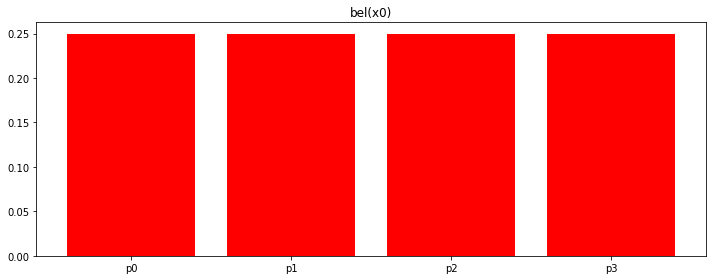



State Transition Probability Matrix @ x1: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x1) =>  p0 = 0.05, p1 = 0.2, p2 = 0.25, p3 = 0.25, 

Probability of the robot sensing the DOOR at step = 1
Door Detected: [[0.4  0.85 0.4  0.85]]

Normalization and η calculation:
eta1 =  1.2794117647058822

New updated belief of the robot's localization probability after step 1:
bel(x1) =>  p0 = 0.06397058823529411, p1 = 0.25588235294117645, p2 = 0.31985294117647056, p3 = 0.31985294117647056, 


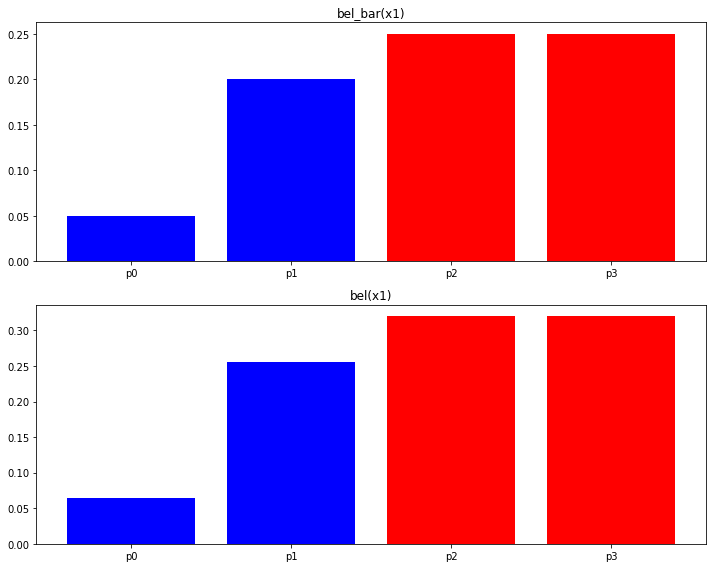



State Transition Probability Matrix @ x2: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x2) =>  p0 = 0.012794117647058824, p1 = 0.08955882352941176, p2 = 0.2302941176470588, p3 = 0.3070588235294117, 

Probability of the robot sensing the WALL at step = 2
Wall Detected: [[0.6  0.15 0.6  0.15]]

Normalization and η calculation:
eta2 =  3.049264705882353

New updated belief of the robot's localization probability after step 2:
bel(x2) =>  p0 = 0.039012651384083046, p1 = 0.2730885596885813, p2 = 0.7022277249134947, p3 = 0.9363036332179929, 


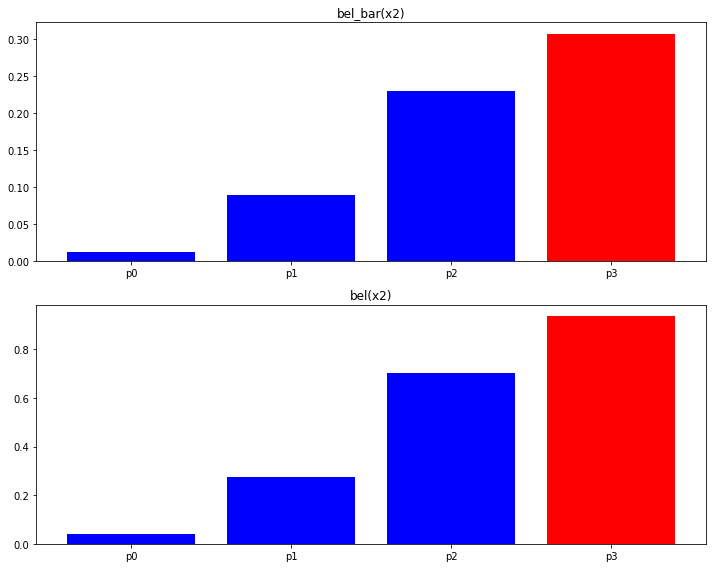



State Transition Probability Matrix @ x3: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x3) =>  p0 = 0.00780253027681661, p1 = 0.07802530276816609, p2 = 0.3121012110726643, p3 = 0.6632150735294117, 

Probability of the robot sensing the DOOR at step = 3
Door Detected: [[0.4  0.85 0.4  0.85]]

Normalization and η calculation:
eta3 =  1.6718068549002645

New updated belief of the robot's localization probability after step 3:
bel(x3) =>  p0 = 0.013044323602348867, p1 = 0.13044323602348865, p2 = 0.5217729440939545, p3 = 1.1087675061996534, 


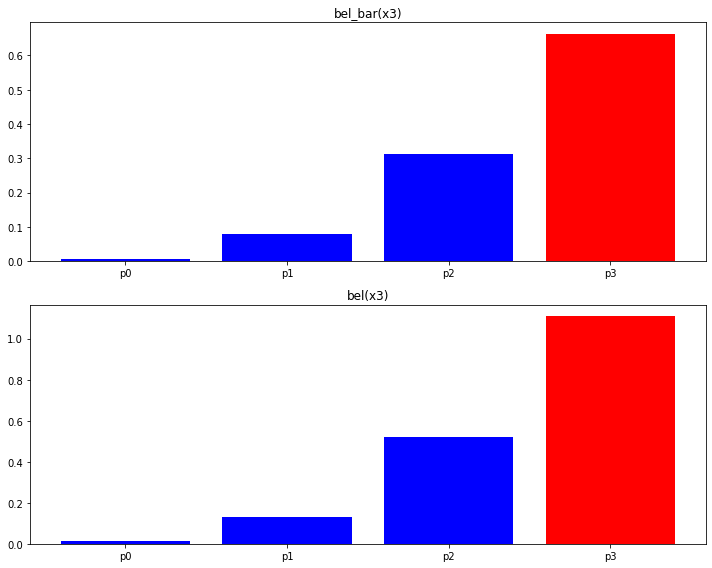

In [65]:
robot_two=Robot2(door_sense,wall_sense,grid_prob,init_bel_x,steps)